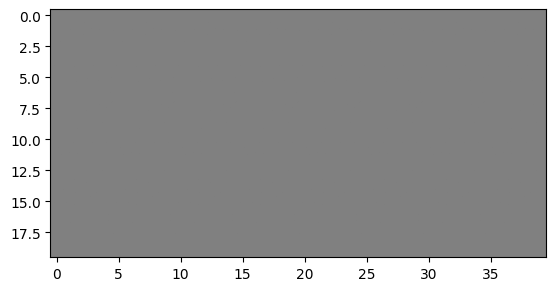

In [1]:

light_post = 40


import numpy as np

# inital a 2d density matrix
density = np.zeros((20, 40))
density.fill(0.5)
#density = np.random.rand(20, 40)


# show the density matrix wiht imshow, 1 means white, 0 means black
import matplotlib.pyplot as plt
plt.imshow(density, cmap='gray', vmin=0, vmax=1, interpolation="bicubic")
plt.show()

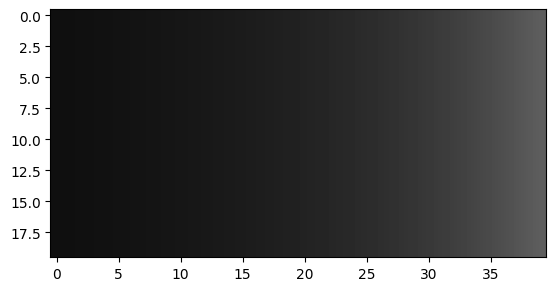

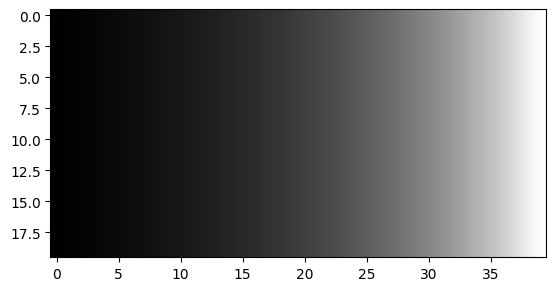

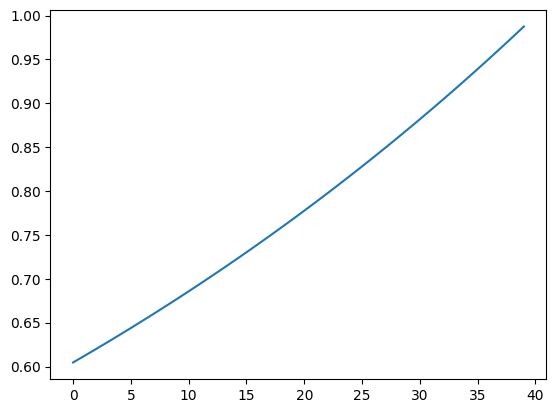

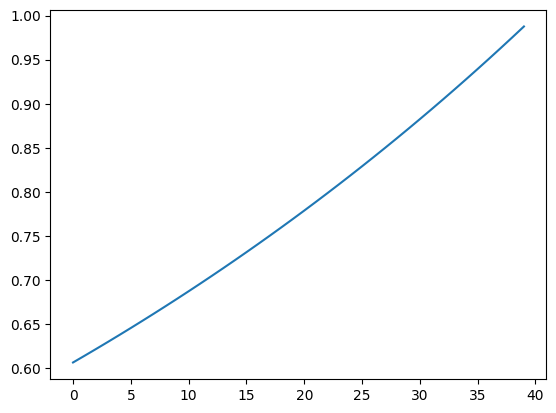

In [104]:
light_map = np.zeros((20, 40))

decay_factor = 1

step = 1/40

light_intensity = 5000

Tl_1_list = []
Tl_2_list = []

def getLi(i,j):
    Tl_1 = 1.0
    Tl_2 = 1.0
    j_t = j
    while j < 40:   
        d = density[i, j]
        Tl_1 *= (1 - decay_factor * d * step)
        Tl_2 *= np.exp(-decay_factor * d * step)
        # print(Tl)
        if Tl_1  < 0.01 or Tl_2 < 0.01:
            break
        j+=1
    if i == 1:
        Tl_1_list.append(Tl_1)
        Tl_2_list.append(Tl_2)

    
    dist = (light_post - j_t) * (light_post - j_t)
    # dist = 1
    Li = light_intensity * Tl_1 / dist 
    return Li
    

for i in range(20):
    for j in range(40):
        d = density[i, j]
        light_map[i, j] += 1 * getLi(i, j) * d * step
        
        
plt.imshow(light_map, cmap='gray',vmin=0 , vmax=1, interpolation="bicubic")
plt.show()
plt.imshow(light_map, cmap='gray', interpolation="bicubic")
plt.show()

# show Tl_1 and Tl_2
plt.plot(Tl_1_list)
plt.show()
plt.plot(Tl_2_list)
plt.show()


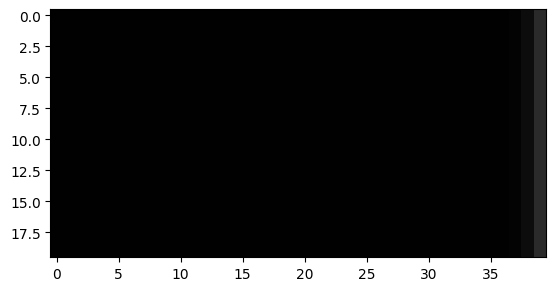

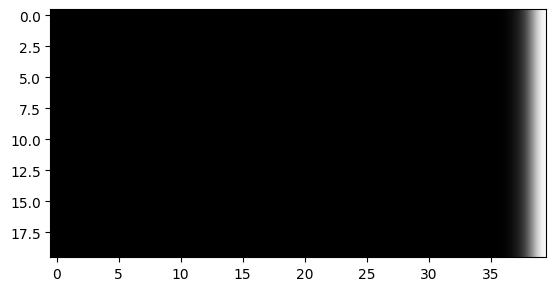

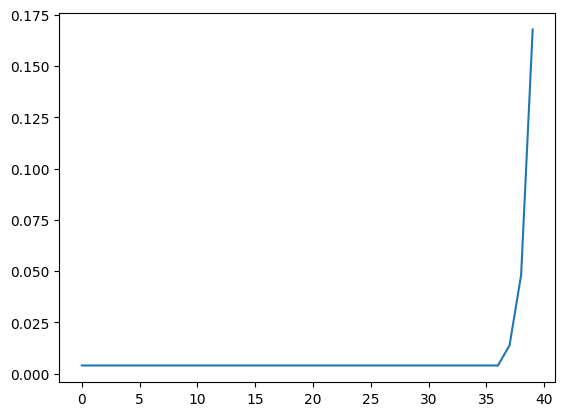

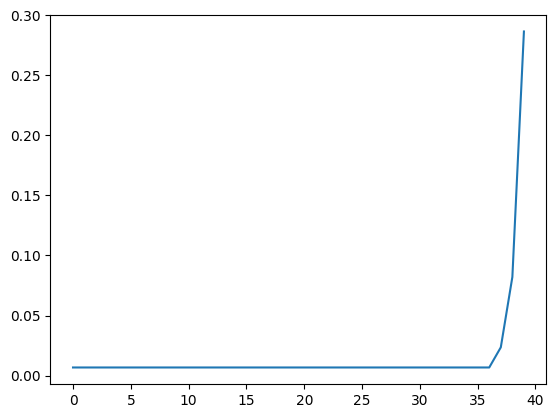

In [7]:
light_map = np.zeros((20, 40))

decay_factor = 100

step = 1/40

light_intensity = 500

Tl_1_list = []
Tl_2_list = []

def getLi(i,j):
    Tl_1 = 1.0
    Tl_2 = 1.0
    j_t = j
    while j < 40:   
        d = density[i, j]
        # Tl_1 *= (1 - decay_factor * d * step)
        Tl_1 *= np.exp(-decay_factor * d * step)
        
        Tl_2 *= np.exp(-decay_factor * d * step)
        # print(Tl)
        if Tl_1  < 0.01:
            break
        j+=1
    if i == 1:
        Tl_1_list.append(Tl_1)
        Tl_2_list.append(Tl_2)

    return Tl_1 

for i in range(20):
    for j in range(40):
        d = density[i, j]
            
        T = np.exp(-decay_factor * d * step) 
        for k in range(100):
            T *= T 
            if T < 0.01:
                break
          
            Tray = getLi(i, j)
            Tvox = np.exp(-decay_factor * d * step)

            Lvox = 10 * (1-Tvox) * Tray   
            light_map[i, j] += Lvox * T       
        
plt.imshow(light_map, cmap='gray',vmin=0 , vmax=1, interpolation="NEAREST")
plt.show()
plt.imshow(light_map, cmap='gray', interpolation="bicubic")
plt.show()

# show Tl_1 and Tl_2
plt.plot(light_map[1,:])
plt.show()
plt.plot(Tl_1_list)
plt.show()
# plt.plot(Tl_2_list)
# plt.show()